In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from scipy.io import loadmat
from pathlib import Path

In [4]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 12
tick_size = 8
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

In [5]:
# Result path
cifar_path = Path('~','projects','cifar').expanduser()
result_path = cifar_path.joinpath('results')
# Trial power
fname = "statistical_power_analysis_50_trials.mat"
path = result_path
fpath = path.joinpath(fname)
dataset = loadmat(fpath)
power_trial = dataset['power']
nt = 50
trials = np.arange(1,nt,2)
# Channel power
fname = "statistical_power_analysis_mvgc_channels.mat"
path = result_path
fpath = path.joinpath(fname)
dataset = loadmat(fpath)
power_chans = dataset['power']
chans = np.arange(1,11,1)
# noise power
fname = "statistical_power_analysis_mvgc_noise.mat"
path = result_path
fpath = path.joinpath(fname)
dataset = loadmat(fpath)
power_noise = dataset['power']
knoise = 31
noise = np.linspace(1,4,0.1)
print(noise)
# Plot analysis
%matplotlib inline
fig, ax = plt.subplots(2,2)
ax[0,0].plot(trials, power_trial)
ax[0,0].set_ylabel("Power")
ax[0,0].set_xlabel("Number of trials")
ax[0,1].plot(noise, power_noise)
ax[0,1].set_ylabel("Power")
ax[0,1].set_xlabel("Noise scaling factor")
ax[0,1].set_ylim((0,1.01))
ax[1,0].plot(chans, power_chans)
ax[1,0].set_ylabel("Power")
ax[1,0].set_xlabel("Number of channels")
ax[1,0].set_ylim((0.9,1.01))
ax[1,1].axis('off')
plt.show()
figpath = Path('~','thesis','overleaf_project','figures', 'method_figure').expanduser()
figname = "power_analysis.pdf"
figpath = figpath.joinpath(figname)
plt.savefig(figpath)

[ 1  2  3  4  5  6  7  8  9 10]


TypeError: 'float' object cannot be interpreted as an integer

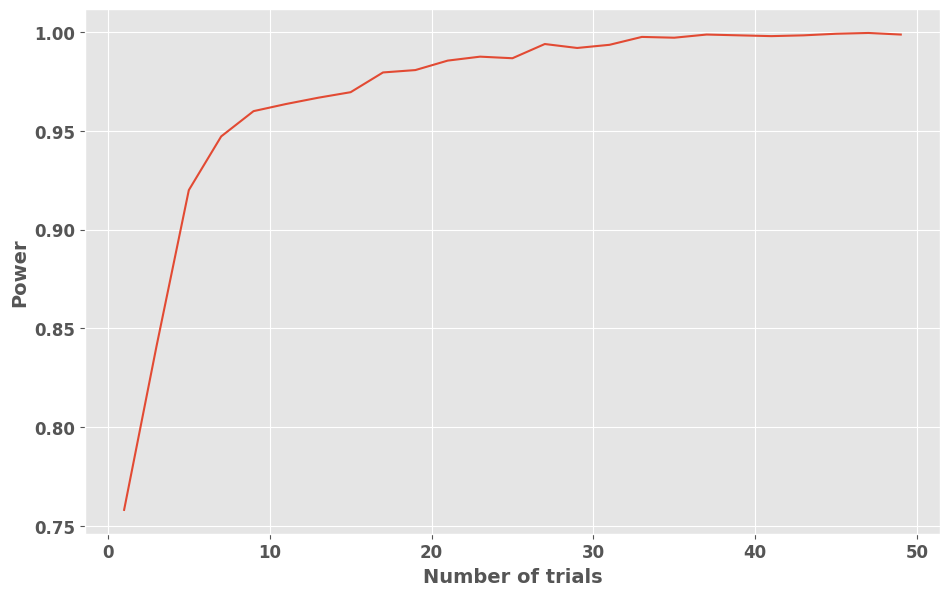

In [28]:
# Power trials mvgc
cifar_path = Path('~','projects','cifar').expanduser()
result_path = cifar_path.joinpath('results')
fname = "statistical_power_analysis_mvgc_trials.mat"
path = result_path
fpath = path.joinpath(fname)
# Read dataset
dataset = loadmat(fpath)
power = dataset['power']
nt = 50
trials = np.arange(1,nt,2)
plt.plot(trials, power)
plt.ylabel("Power")
plt.xlabel("Number of trials")
plt.show()

[0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6
 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9]


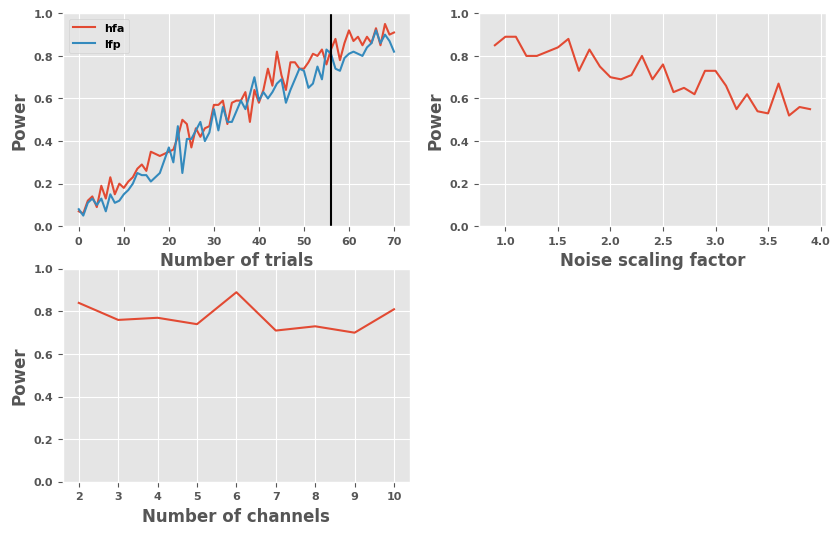

In [27]:
# Td power
# Result path
%matplotlib inline
cifar_path = Path('~','projects','cifar').expanduser()
result_path = cifar_path.joinpath('results')
signal = "lfp" 

# Trial power
fname = "power_analysis_td_gc_71_trials_" + signal + ".mat"
path = result_path
fpath = path.joinpath(fname)
dataset = loadmat(fpath)
power_hfa = dataset['spow']
nt = 71
trials = np.arange(0,nt,1)
signal = "hfa"
fname = "power_analysis_td_gc_71_trials_" + signal + ".mat"
path = result_path
fpath = path.joinpath(fname)
dataset = loadmat(fpath)
power_lfp = dataset['spow']

# Channel power
nc = 11
channels = np.arange(2,nc,1)
signal = "hfa"
fname = "power_analysis_td_gc_9_channels_hfa.mat"
path = result_path
fpath = path.joinpath(fname)
dataset = loadmat(fpath)
power_channel = dataset['spow']

# Channel noise
signal="hfa"
fname = "power_analysis_td_gc_noise_" + signal + ".mat"
path = result_path
fpath = path.joinpath(fname)
dataset = loadmat(fpath)
power_noise = dataset['spow']
noise = np.arange(0.9,4,0.1)
print(noise)
# Plot analysis
%matplotlib inline
fig, ax = plt.subplots(2,2)
ax[0,0].plot(trials, power_hfa, label="hfa")
ax[0,0].plot(trials, power_lfp, label="lfp")
ax[0,0].axvline(x=56, color="k")
ax[0,0].set_ylabel("Power")
ax[0,0].set_xlabel("Number of trials")
ax[0,0].set_ylim(0,1)
ax[0,1].plot(noise, power_noise)
ax[0,1].set_ylabel("Power")
ax[0,1].set_ylim(0,1)
ax[0,1].set_xlabel("Noise scaling factor")
ax[1,0].plot(channels, power_channel[0,:])
ax[1,0].set_ylabel("Power")
ax[1,0].set_xlabel("Number of channels")
ax[1,0].set_ylim(0,1)
ax[1,1].axis('off')
ax[0,0].legend()
plt.show()

In [ ]:
# Show the effect of number of channels on statistical power
